<a href="https://colab.research.google.com/github/rktejesh/Twitter-Sentiment-Analysis/blob/main/project_bda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import os
import glob
import numpy as np
import re
from string import punctuation, whitespace
import warnings
warnings.filterwarnings("ignore")
!pip install ftfy
import ftfy
from sklearn.utils import shuffle
import gc
import matplotlib.pyplot as plt
import multiprocess as mp
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords
import string


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [2]:
#!unzip /content/drive/MyDrive/Colab\ Notebooks/datasets/ukraine-war-tweets-dataset-65-days.zip
#PATH = "/content/drive/MyDrive/Colab Notebooks/datasets/ukraine-war-tweets-dataset-65-days.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/datasets/ukraine-war-tweets-dataset-65-days.zip
  inflating: Russia_invade.csv       
  inflating: Russian_border_Ukraine.csv  
  inflating: Russian_troops.csv      
  inflating: StandWithUkraine.csv    
  inflating: Ukraine_border.csv      
  inflating: Ukraine_nato.csv        
  inflating: Ukraine_troops.csv      
  inflating: Ukraine_war.csv         


In [48]:
! wget https://raw.githubusercontent.com/rktejesh/Notebooks/main/kaggle.json
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d bwandowando/ukraine-russian-crisis-twitter-dataset-1-2-m-rows -f 0401_UkraineCombinedTweetsDeduped.csv.gzip

--2022-05-15 18:57:19--  https://raw.githubusercontent.com/rktejesh/Notebooks/main/kaggle.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64 [text/plain]
Saving to: ‘kaggle.json.1’

kaggle.json.1       100%[===================>]      64  --.-KB/s    in 0s      

2022-05-15 18:57:19 (3.15 MB/s) - ‘kaggle.json.1’ saved [64/64]

mkdir: cannot create directory ‘/root/.kaggle’: File exists
0401_UkraineCombinedTweetsDeduped.csv.gzip.zip: Skipping, found more recently modified local copy (use --force to force download)


In [49]:
!unzip /content/0401_UkraineCombinedTweetsDeduped.csv.gzip.zip
! cp /content/0401_UkraineCombinedTweetsDeduped.csv.gzip /content/0401_UkraineCombinedTweetsDeduped.csv.gz
! gzip -d /content/0401_UkraineCombinedTweetsDeduped.csv.gz

Archive:  /content/0401_UkraineCombinedTweetsDeduped.csv.gzip.zip
replace 0401_UkraineCombinedTweetsDeduped.csv.gzip? [y]es, [n]o, [A]ll, [N]one, [r]ename: gzip: /content/0401_UkraineCombinedTweetsDeduped.csv already exists; do you wish to overwrite (y or n)? ^C


In [4]:
#PATH = "/content/"
#filenames = glob.glob(os.path.join(PATH, "*.csv"))
#df = pd.concat((pd.read_csv(f) for f in filenames))

In [50]:
df = pd.read_csv("/content/0401_UkraineCombinedTweetsDeduped.csv")

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364875 entries, 0 to 364874
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      364875 non-null  int64 
 1   userid          364875 non-null  int64 
 2   username        364875 non-null  object
 3   acctdesc        286432 non-null  object
 4   location        212933 non-null  object
 5   following       364875 non-null  int64 
 6   followers       364875 non-null  int64 
 7   totaltweets     364875 non-null  int64 
 8   usercreatedts   364875 non-null  object
 9   tweetid         364875 non-null  int64 
 10  tweetcreatedts  364875 non-null  object
 11  retweetcount    364875 non-null  int64 
 12  text            364875 non-null  object
 13  hashtags        364875 non-null  object
 14  language        364875 non-null  object
 15  coordinates     97 non-null      object
 16  favorite_count  364875 non-null  int64 
 17  extractedts     364875 non-nu

In [52]:
df.head()

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
0,0,16882774,Yaniela,"Animal lover, supports those who fight injustice wherever it raises its evil head. Personality flaws: Grumpy on occasion, cannot tolerate stupidity. #VOTEBLUE",Hawaii,1158,392,88366,2008-10-21 07:34:04.000000,1509681950042198030,2022-04-01 00:00:00.000000,3412,⚡The Ukrainian Air Force would like to address misinformation published in multiple Western media outlets regarding the situation in the 🇺🇦 sky and support from our @NATO allies. \nMore in 🧵(1/16)\n#ProtectUАSky #StopRussia #UkraineUnderAttaсk,[],en,NaN,0,2022-04-01 00:44:20.097867
1,1,3205296069,gregffff,NaN,NaN,122,881,99853,2015-04-25 11:24:34.000000,1509681950151348229,2022-04-01 00:00:00.000000,100,Chernihiv oblast. Ukrainians welcome their liberators from #russianinvasion. \n\n#StandWithUkraine️ #UkraineUnderAttack #UkraineWillWin #PutinIsaWarCriminal #StopPutin #RussianUkrainianWar #RussiaGoHome #РоссияСмотри #нетвойне https://t.co/86ixYuEtNb,"[{'text': 'russianinvasion', 'indices': [77, 93]}, {'text': 'StandWithUkraine️', 'indices': [97, 115]}, {'text': 'UkraineUnderAttack', 'indices': [116, 135]}]",en,NaN,0,2022-04-01 00:09:37.148770
2,2,1235940869812809728,ThanapornThon17,เล่นไวโอลิน\nพูดภาษาจีน,NaN,231,72,5481,2020-03-06 14:52:01.000000,1509681950683926556,2022-04-01 00:00:00.000000,9,America 🇺🇸 is preparing for something worse than the #RussianUkrainianWar...Taiwan 🇹🇼 Last month we entered into a new cold war with Russia 🇷🇺 what's the best policy for the future of 🇺🇸🇨🇳 relations over Taiwan? \n\nFull Video👇\nhttps://t.co/W58KdpqSly\n\n#China #Taiwan,"[{'text': 'RussianUkrainianWar', 'indices': [74, 94]}]",en,NaN,0,2022-04-01 00:09:37.125654
3,3,1347985375566966784,I_Protest_2021,01000001 01101110 01101111 01101110 01111001 01101101 01101111 01110101 01110011 00100001,International Web Zone,399,377,301,2021-01-09 19:15:44.000000,1509681951116046336,2022-04-01 00:00:00.000000,573,"JUST IN: #Anonymous has hacked &amp; released 62,000 emails from the Marathon Group, a Russian investment firm owned by oligarch Alexander Vinokurov, currently under EU sanctions. Vinokurov is also the son-in-law of Russian Foreign Minister Lavrov. #OpRussia \n#DDoSecrets https://t.co/kATuo2CxC1","[{'text': 'Anonymous', 'indices': [25, 35]}]",en,NaN,0,2022-04-01 00:31:39.674382
4,4,1505394816636846083,Marsh_Win_01,🌿@Pickaw @TWITTERPICKER 🌿Winning isn’t everything🌾but wanting to win is🎊 #Marsh_Win_01 🌱,Hunter Account,158,25,8982,2022-03-20 04:04:40.000000,1509681951304990720,2022-04-01 00:00:00.000000,190,"***PUBLIC MINT NOW LIVE***\n\nFor \n@billionaire_Wmn\n\nWin $100,000 during public sale mint. \n\nVisit https://t.co/qev7nrD3my to Mint and for further information! Good Luck!\n#nft #mint https://t.co/54daHYVlAP",[],en,NaN,0,2022-04-01 00:09:37.101459


In [72]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
df2 = df[["username", "text", "language"]]

In [73]:
df2 = df2[df2.text.notnull()]
df_en = df2[df2.language == 'en'].copy(deep=True)
df_en.rename(columns={'text': 'tweet'}, inplace=True)
df_en['troll'] = 1

In [74]:
df_en.drop(["language"], axis=1, inplace=True)
df_en.head()

,username,tweet,troll
0,Yaniela,⚡The Ukrainian Air Force would like to address misinformation published in multiple Western media outlets regarding the situation in the 🇺🇦 sky and support from our @NATO allies. \nMore in 🧵(1/16)\n#ProtectUАSky #StopRussia #UkraineUnderAttaсk,1
1,gregffff,Chernihiv oblast. Ukrainians welcome their liberators from #russianinvasion. \n\n#StandWithUkraine️ #UkraineUnderAttack #UkraineWillWin #PutinIsaWarCriminal #StopPutin #RussianUkrainianWar #RussiaGoHome #РоссияСмотри #нетвойне https://t.co/86ixYuEtNb,1
2,ThanapornThon17,America 🇺🇸 is preparing for something worse than the #RussianUkrainianWar...Taiwan 🇹🇼 Last month we entered into a new cold war with Russia 🇷🇺 what's the best policy for the future of 🇺🇸🇨🇳 relations over Taiwan? \n\nFull Video👇\nhttps://t.co/W58KdpqSly\n\n#China #Taiwan,1
3,I_Protest_2021,"JUST IN: #Anonymous has hacked &amp; released 62,000 emails from the Marathon Group, a Russian investment firm owned by oligarch Alexander Vinokurov, currently under EU sanctions. Vinokurov is also the son-in-law of Russian Foreign Minister Lavrov. #OpRussia \n#DDoSecrets https://t.co/kATuo2CxC1",1
4,Marsh_Win_01,"***PUBLIC MINT NOW LIVE***\n\nFor \n@billionaire_Wmn\n\nWin $100,000 during public sale mint. \n\nVisit https://t.co/qev7nrD3my to Mint and for further information! Good Luck!\n#nft #mint https://t.co/54daHYVlAP",1


In [77]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('@[A-Za-z0–9]+', '', text)
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    text = re.sub(emoj, '', text)
    ''' text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text) '''
    return text
df_en["tweet"] = df_en["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [78]:
df_en.head()

,username,tweet,troll
0,Yaniela,the ukrainian air force would like address misinformation published multiple western media outlets regarding situation sky support allies stoprussia ukraineunderattaсk,1
1,gregffff,chernihiv oblast ukrainians welcome liberators russianinvasion standwithukraine ukraineunderattack ukrainewillwin putinisawarcriminal stopputin russianukrainianwar russiagohome россиясмотри нетвойне,1
2,ThanapornThon17,america preparing something worse russianukrainianwartaiwan last month entered new cold war russia whats best policy future relations taiwan full videochina taiwan,1
3,I_Protest_2021,anonymous hacked amp released emails marathon group russian investment firm owned oligarch alexander vinokurov currently eu sanctions vinokurov also soninlaw russian foreign minister lavrov oprussia ddosecrets,1
4,Marsh_Win_01,public mint livefor wmnwin public sale mint visit mint information good lucknft mint,1


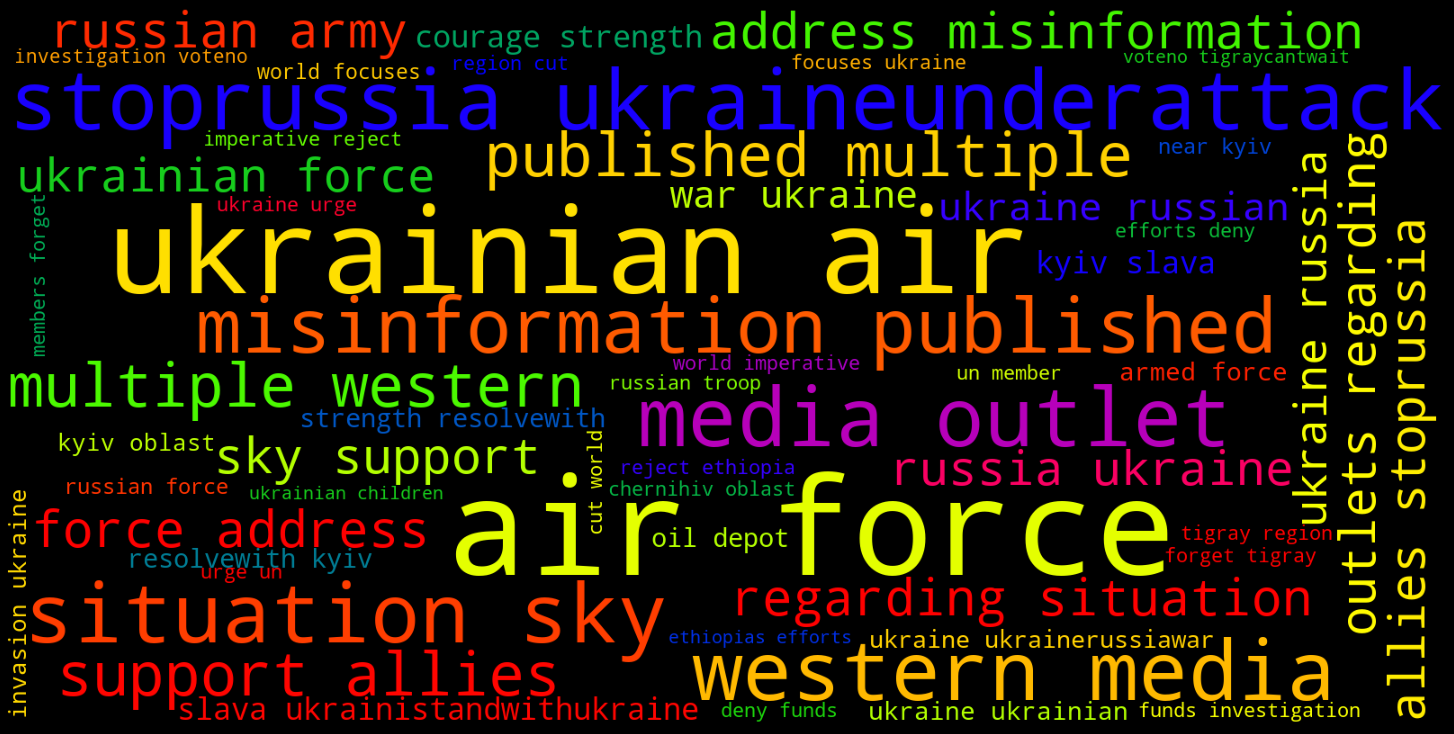

In [79]:
def word_cloud(text):
    stopwords = set(STOPWORDS)
    allWords = ' '.join([twts for twts in text])
    wordCloud = WordCloud(background_color='black',width = 1600, height = 800,stopwords = stopwords,min_font_size = 20,max_font_size=150,colormap='prism').generate(allWords)
    fig, ax = plt.subplots(figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud)
    ax.axis("off")
    fig.tight_layout(pad=0)
    plt.show()

word_cloud(df_en['tweet'].values)


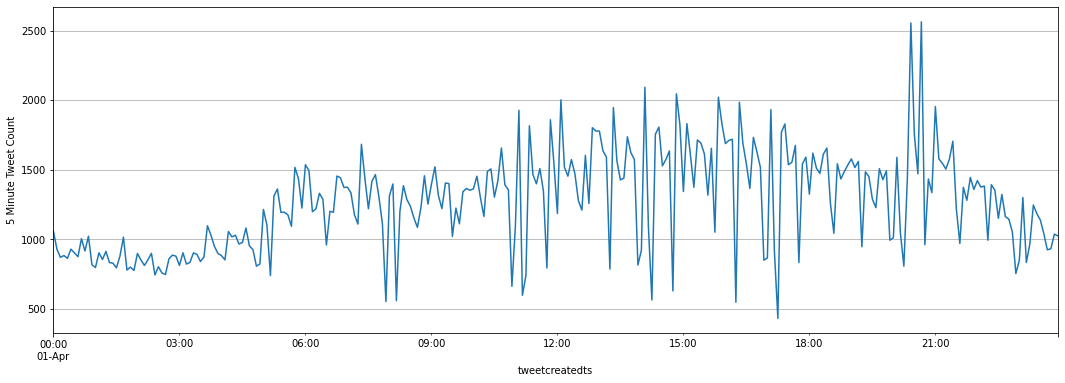

In [81]:
df['tweetcreatedts'] = pd.to_datetime(df['tweetcreatedts'], errors='coerce')
tweet_df_5min = df.groupby(pd.Grouper(key='tweetcreatedts', freq='5Min', convention='start')).size()
tweet_df_5min.plot(figsize=(18,6))
plt.ylabel('5 Minute Tweet Count')
#plt.title('#climatechange Tweet Freq. Count, November 20 to December 5, 2018')
plt.grid(True)

In [85]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)

#Assigning Initial Values
positive = 0
negative = 0
neutral = 0
#Creating empty lists
tweet_list1 = []
neutral_list = []
negative_list = []
positive_list = []

#Iterating over the tweets in the dataframe
for tweet in df_en['tweet']:
    tweet_list1.append(tweet)
    analyzer = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = analyzer['neg']
    neu = analyzer['neu']
    pos = analyzer['pos']
    comp = analyzer['compound']

    if neg > pos:
        negative_list.append(tweet) #appending the tweet that satisfies this condition
        negative += 1 #increasing the count by 1
    elif pos > neg:
        positive_list.append(tweet) #appending the tweet that satisfies this condition
        positive += 1 #increasing the count by 1
    elif pos == neg:
        neutral_list.append(tweet) #appending the tweet that satisfies this condition
        neutral += 1 #increasing the count by 1 

positive = percentage(positive, len(df_en)) #percentage is the function defined above
negative = percentage(negative, len(df_en))
neutral = percentage(neutral, len(df_en))


In [90]:
#Converting lists to pandas dataframe
tweet_list1 = pd.DataFrame(tweet_list1)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
#using len(length) function for counting
print("There have been", len(tweet_list1) ,  "tweets", end='\n')
print("Positive Sentiment:", '%.2f' % len(positive_list), end='\n')
print("Neutral Sentiment:", '%.2f' % len(neutral_list), end='\n')
print("Negative Sentiment:", '%.2f' % len(negative_list), end='\n')


There have been 254626 tweets
Positive Sentiment: 102659.00
Neutral Sentiment: 41494.00
Negative Sentiment: 110473.00


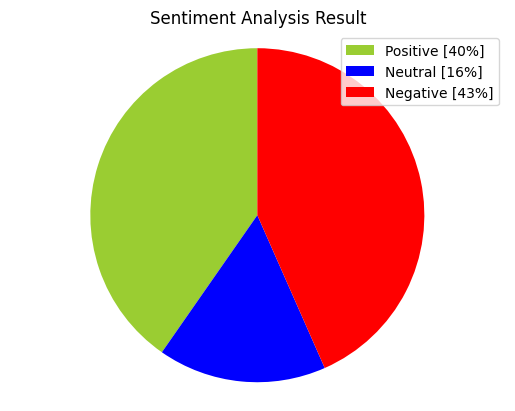

In [92]:
labels = ['Positive ['+str(round(positive))+'%]' , 'Neutral ['+str(round(neutral))+'%]','Negative ['+str(round(negative))+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result" )
plt.axis('equal')
plt.show()


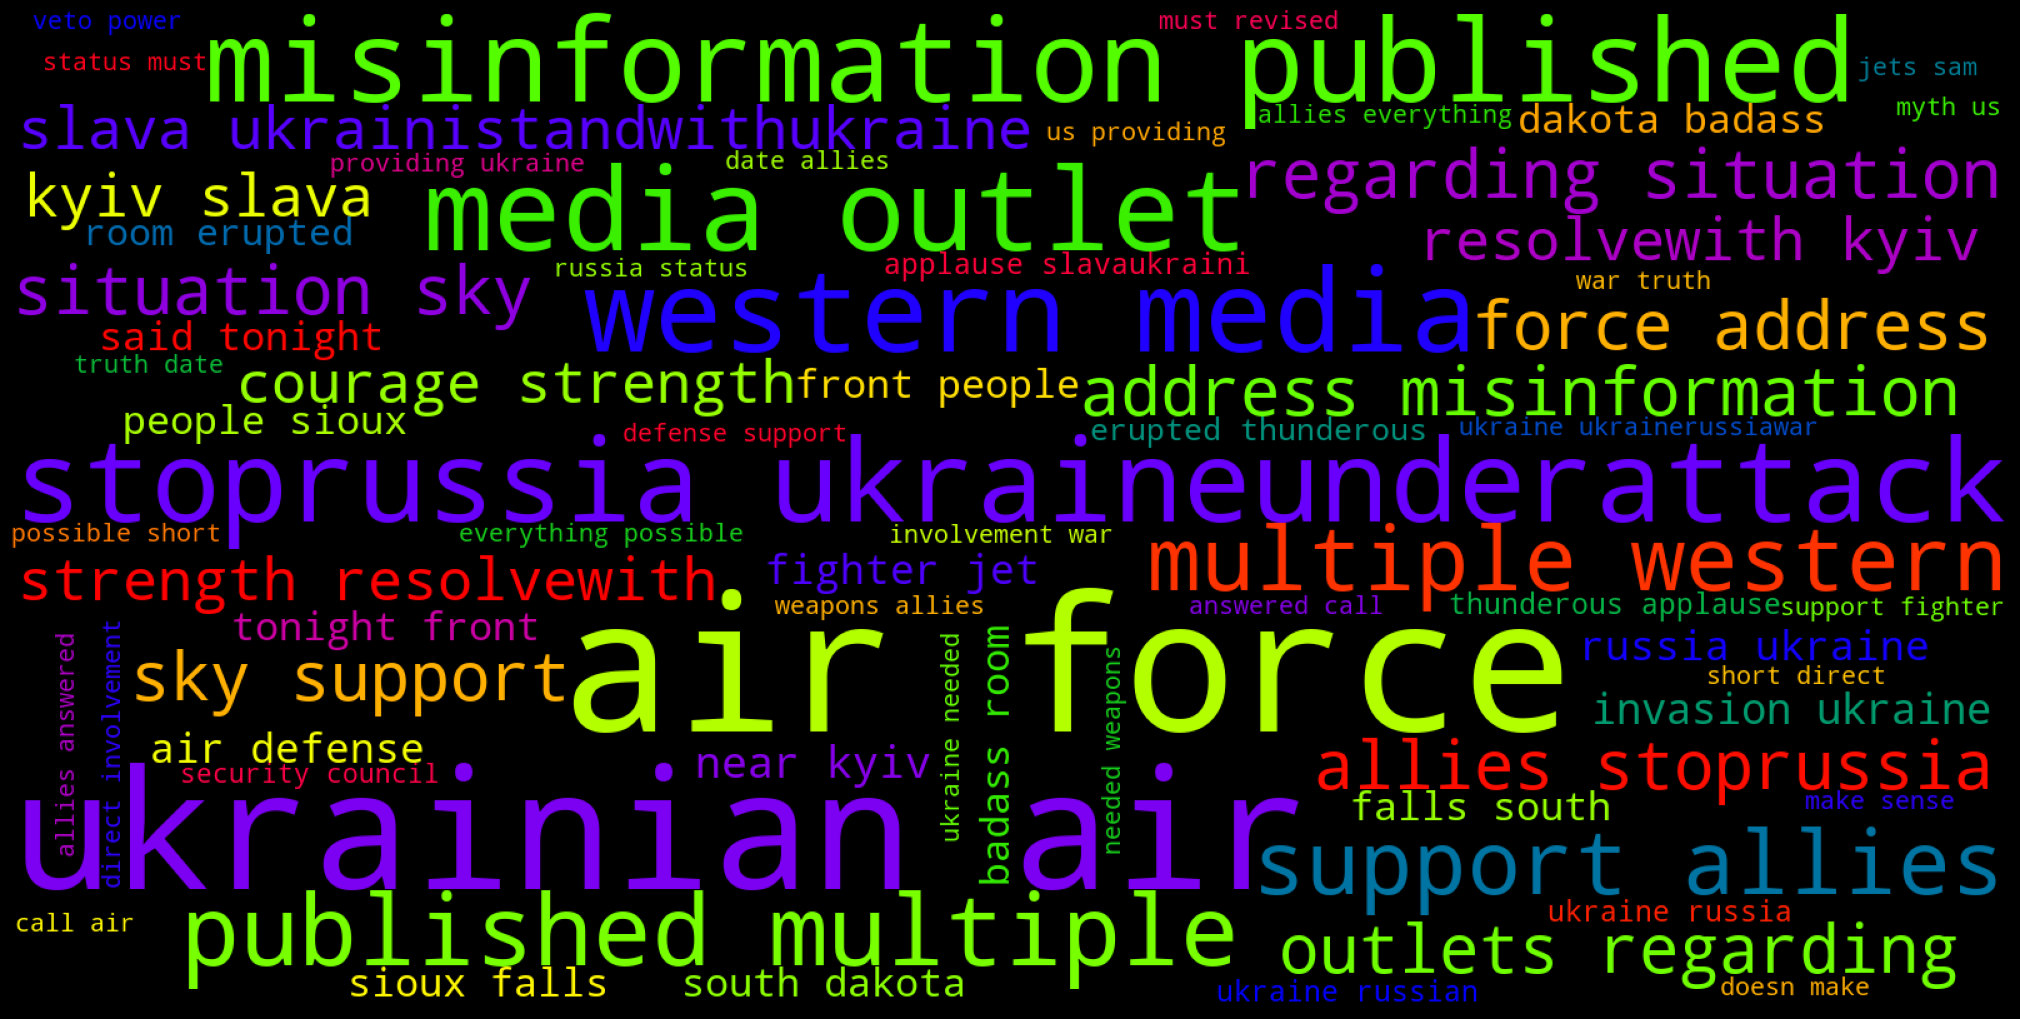

In [94]:
#positive_list.head()
word_cloud(positive_list[0].values)

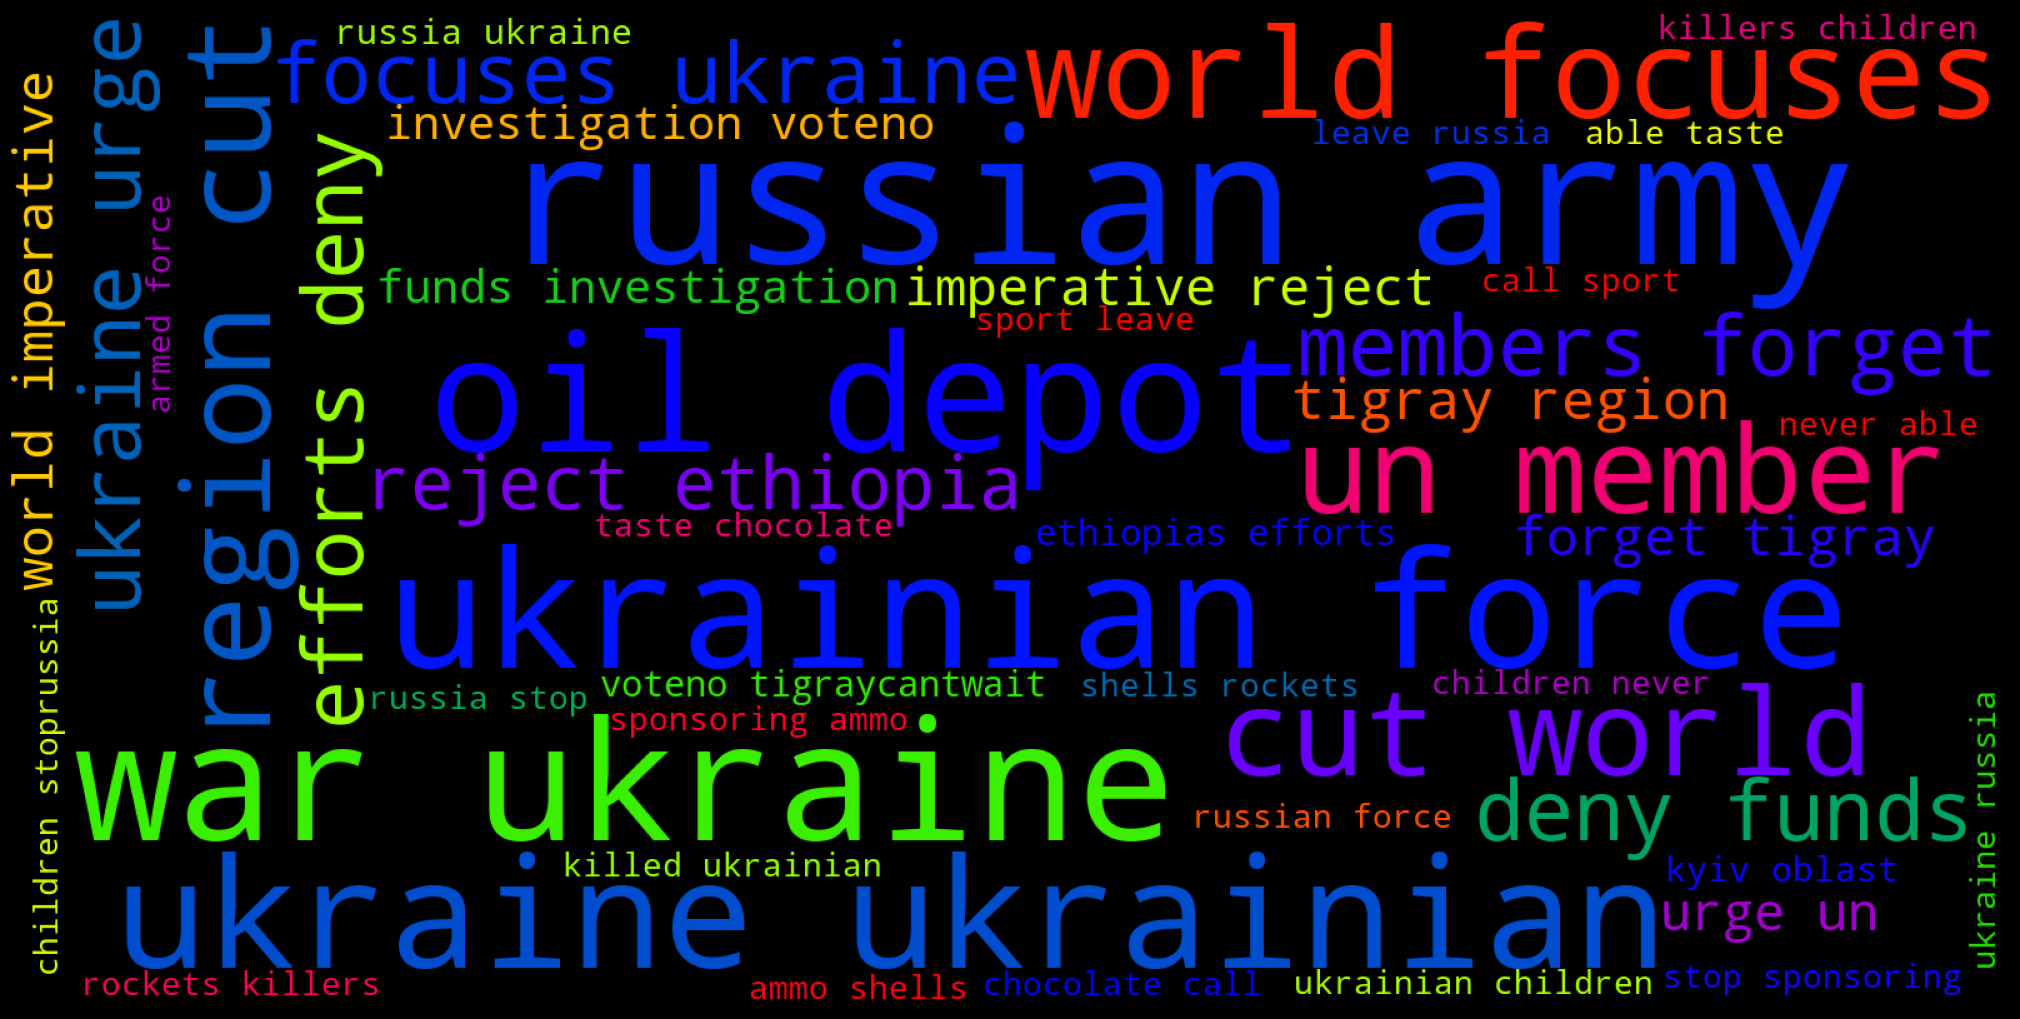

In [95]:
word_cloud(negative_list[0].values)

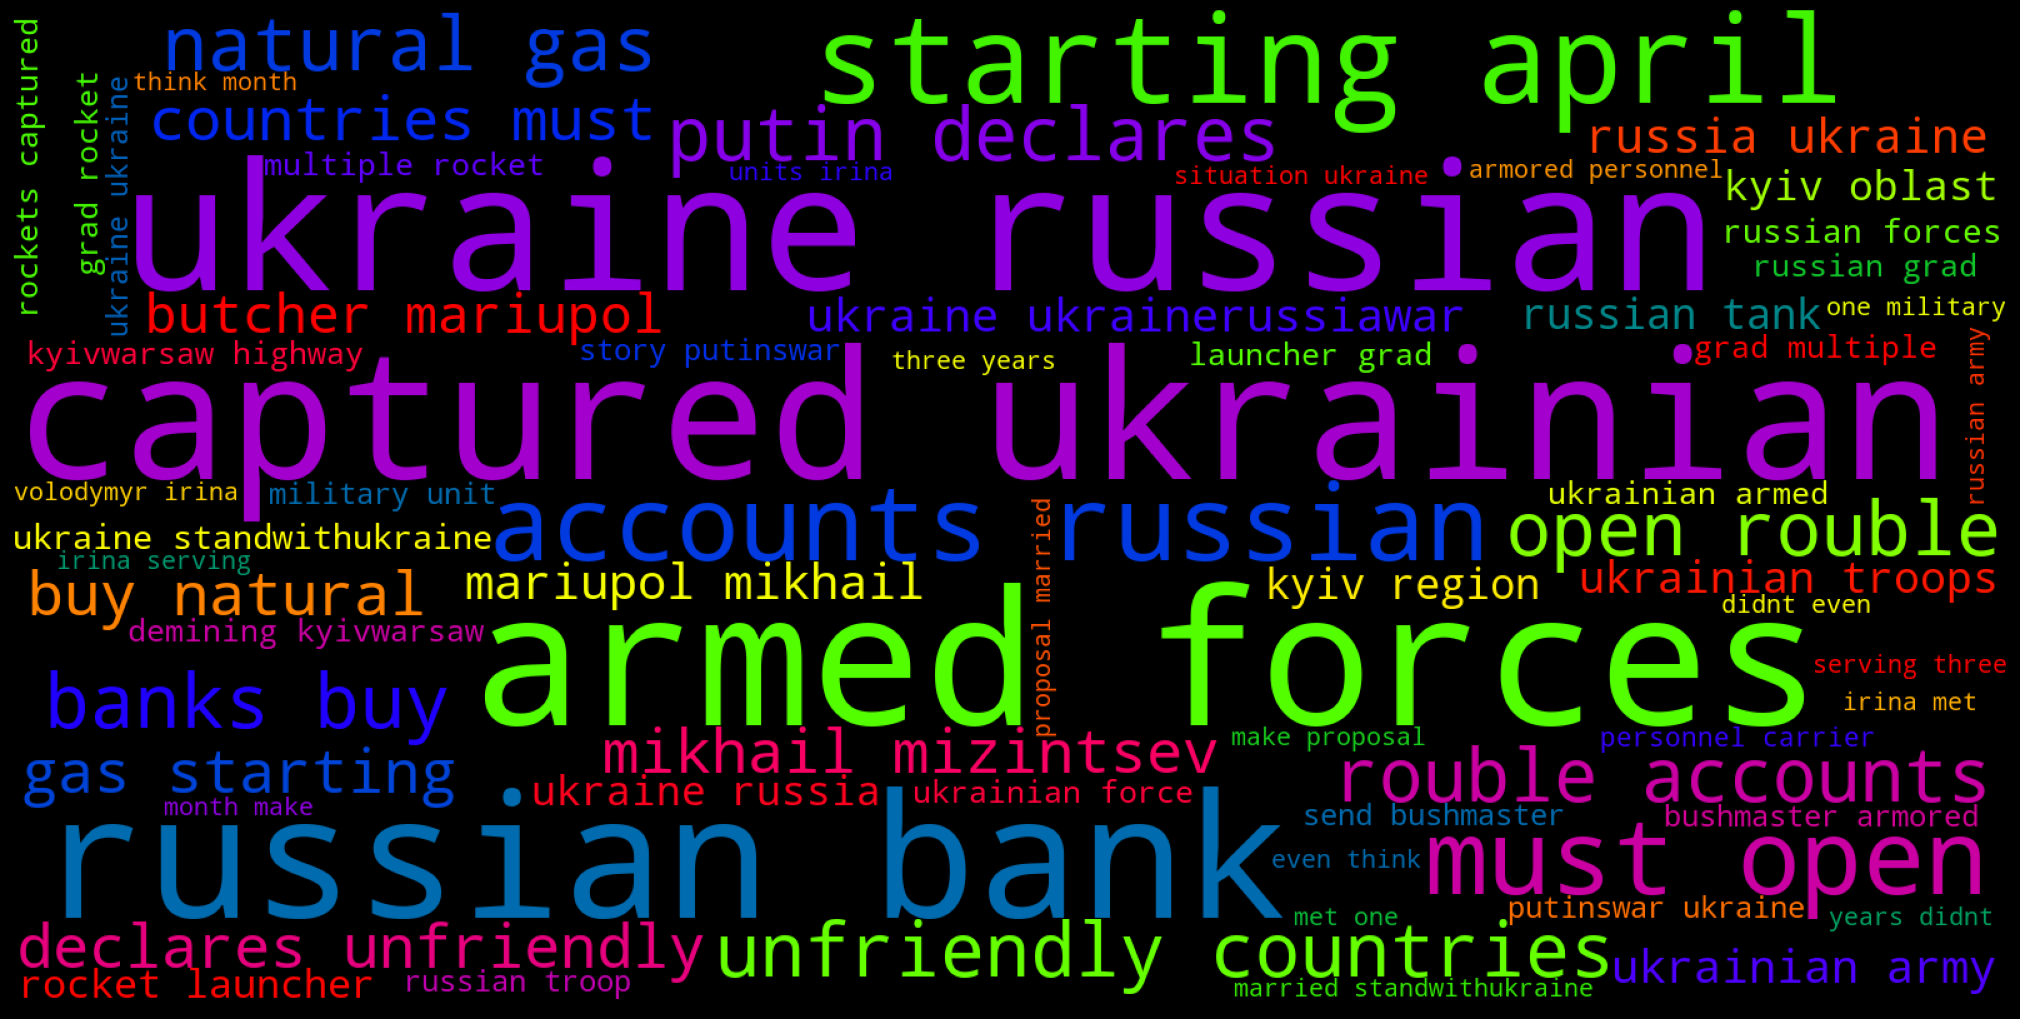

In [96]:
word_cloud(neutral_list[0].values)